# TP1: Manipulation des données sous PYTHON

Utilisation du package `pandas`


## Objectifs du TP

Un préalable à l’utilisation d’algorithmes d’apprentissage statistique
est le chargement, la mise en forme et l’analyse de base de données. Le
package `pandas` de `Python` met à dispostion un ensemble de structures
de données et d’outils très pratiques permettant cela. L’objectif de ce
TP est de se familiariser avec ces stuctures et outils.

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Liste des fonctions que nous utiliserons

Ci-dessous $s$ représente une liste et $t$ un tableau à 2 dimensions

| Fonction | Description |
|:---------|:-------------|
|`s = Series(data, index)`|Creation d’une liste indexée |
|`t = DataFrame(data, index, columns)`|Creation d’un tableau à 2 dimensions|
|`s.index` or `t.index`|Renvoie l’index de `s` ou de `t`|
|`s.values`|Renvoie la liste des valeurs de `s`|
|`t = read_csv(’fichier.csv’)`|Charge une base contenue dans `fichier.csv` dans `t`|
|`random.permutation(x)`|Si `x` est entier, crée une séquence aléatoire d’entiers entre 1 et `x`|
|`np.random.choice(a,size,replace)`|Génère un échantillon aléatoire d’éléments de `a`|avec (`replace=True`) ou sans remise (`replace`=False)|
|`t.drop(label,axis)`|Crée un DataFrame à partir de `t` dont les lignes (axis=0)|ou les colonnes (axis=1) spécifiées dans `label` ont été supprimées|
|`t.duplicated()`|Renvoie la liste des doublons de lignes|
|`t.replace(value1,value2)`|Remplace `value1` par `value2` dans `t`|
|`t.fillna(value)`|Remplace les valeurs manquantes `nan` par `value`|
|`t.dropna(axis)`|Supprime les lignes (axis=0) ou les colonnes (axis=1)|avec valeurs manquantes|
|`t.describe()`|Affiche des statistiques sur `t`|
|`t.mean(axis)`|Renvoie la valeur moyenne selon l’axe précisé (0 ou 1)|
|`t.min(axis)`|Renvoie la valeur mini selon l’axe précisé (0 ou 1)|
|`t.max(axis)`|Renvoie la valeur maxi selon l’axe précisé (0 ou 1)|
|`t.value_counts()`|Renvoie le nombre de valeurs unique de `t`|
|`s.hist()`|Affiche l’histogramme des valeurs de `s`|
|`t.crosstab(column1,column2)`|Calcule et affiche le tableau de contingence des 2 variables de `t`|

## 1 - La structure de données `Series`

Le package `pandas` propose une structure pour gérer les listes
d’objets. Il s’agit d’un tableau à deux colonnes dont la première
colonne correspond aux indices et la deuxième aux valeurs
correspondantes.

(a) Créer un objet de type `Series` contenant la liste suivante:

|`crab` | `deer` | `hamster` | `dolphin` |
|:-----:|:------:|:---------:|:---------:|

In [2]:
s = pd.Series(data = ["crab", "deer", "hamster", "dolphin"])

In [3]:
s

0       crab
1       deer
2    hamster
3    dolphin
dtype: object

(b) Faire afficher à l’écran la liste des index de cette liste avec la fonction `s.index`

In [3]:
print(s.index)

RangeIndex(start=0, stop=4, step=1)


(c) Tester les méthodes `loc` et `iloc` pour afficher à l’écran l’élément de la liste dont l’index est 2

In [4]:
# Utilise un entier pour localiser l'élément de la série correspondante.
s.iloc[2]

'hamster'

In [5]:
# Utilise l'indice pour trouver l'élement correspondant.
# C'est un entier ici car on n'a pas spécifié d'indices.
s.loc[2]

'hamster'

In [6]:
# Une combinaison des deux méthodes précédentes, fonctionne avec le numéro comme l'indice.
s[2]

'hamster'

(d) Supposons qu'on ne connaît pas l'indice de `’deer’`. Trouver comment afficher uniquement la ligne de s contenant `’deer’`.

In [7]:
print(s)
print()

# Renvoie une série Pandas dont les données sont booléennes.
print(s == "deer")
print()

# La série peut prendre en argument une série de booléens, 
# et retourne alors la série ne contenant que les entrées correspondantes.
print(s[s == "deer"])
print()

0       crab
1       deer
2    hamster
3    dolphin
dtype: object

0    False
1     True
2    False
3    False
dtype: bool

1    deer
dtype: object



In [8]:
# s.isin(["deer"]) renvoie la même chose que s == "deer", on peut donc aussi faire comme ceci
s[s.isin(["deer"])]

1    deer
dtype: object

(e) Modifier les index de la liste pour qu’ils soient maintenant: `’a’,’b’,’c’,’d’`

In [9]:
s.index = ["a", "b", "c", "d"]

In [10]:
s

a       crab
b       deer
c    hamster
d    dolphin
dtype: object

(f) A nouveau, utiliser les méthodes `loc` et `iloc` pour afficher à l’écran l'élément "hamster". Qu'est-ce qui a changé ?

In [11]:
s.iloc[2]

'hamster'

In [12]:
s.loc["c"]

# Cette fois, si on essaye s.loc[2], on obtient un message d'erreur car 2 n'est plus un indice de la série.

'hamster'

## 2 - La structure de données `DataFrame`

La deuxième structure proposée par `pandas` permet de gérer des tableaux
de données. C’est donc un tableau à 2 dimensions avec des index de
lignes et colonnes. L’index de colonnes correspond aux noms des
variables de la base de données et l’index des lignes correspond aux
différents individus de la population que représente la base.

(a) Créer un objet df de type `DataFrame` contenant les données suivantes:

|  _Animal_ | **Aquatic** | **Tail** |
|:---------:|:-----------:|:--------:|
|**crab**   |     True    |  False   |
|**deer**   |     False   |  True    |
|**hamster**|     False   |  True    |
|**dolphin**|     True    |  False   |

*Ici, j'ai choisi de mettre la variable Animal comme index de mon data frame (df).*

In [13]:
df = pd.DataFrame(data = {"Aquatic":[True, False, False, True], "Tail":[False, True, True, False]}, index = s)
df.index.name = 'Animal'
df

,Aquatic,Tail
Animal,,
crab,True,False
deer,False,True
hamster,False,True
dolphin,True,False


(b) Créer un autre dataframe df1 de la forme suivante:

|    |   Animal  | **Aquatic** | **Tail** |
|:--:|:---------:|:-----------:|:--------:|
|**a**|    crab   |     True    |  False   |
|**b**|    deer   |     False   |  True    |
|**c**|    hamster|     False   |  True    |
|**d**|    dolphin|     True    |  False   |

*Dans ce cas, j'ai choisi de ne pas mettre d'index à mon dataframe. Comme la Serie s a déjà des indices, ceux-ci sont repris par défaut dans mon data frame (df1).*

In [14]:
df1 = pd.DataFrame(data = {"Animal":s, "Aquatic":[True, False, False, True], "Tail":[False, True, True, False]})
df1

,Animal,Aquatic,Tail
a,crab,True,False
b,deer,False,True
c,hamster,False,True
d,dolphin,True,False


In [15]:
# Pour mettre une colonne en index
df1.set_index('Animal')

,Aquatic,Tail
Animal,,
crab,True,False
deer,False,True
hamster,False,True
dolphin,True,False


(c) Faire afficher à l’écran la liste des index de df et df1 avec la fonction `t.index`


In [16]:
df.index

Index(['crab', 'deer', 'hamster', 'dolphin'], dtype='object', name='Animal')

In [17]:
df1.index

Index(['a', 'b', 'c', 'd'], dtype='object')

(d) Faire afficher à l’écran la liste des colonnes (variables) avec la fonction `t.columns`

In [18]:
df.columns

Index(['Aquatic', 'Tail'], dtype='object')

In [19]:
df1.columns

Index(['Animal', 'Aquatic', 'Tail'], dtype='object')

In [20]:
df.loc[["deer"]]

,Aquatic,Tail
Animal,,
deer,False,True


In [21]:
df1.Animal == "deer"

a    False
b     True
c    False
d    False
Name: Animal, dtype: bool

In [22]:
df1.loc[df1.Animal == "deer"] # df1.Animal == "deer" permet de retrouver le(s) indice(s) correspondant à 'deer'

,Animal,Aquatic,Tail
b,deer,False,True


(f) Créer une `DataFrame` qui contiendra uniquement les animaux “aquatiques”

In [23]:
df[df.Aquatic]

,Aquatic,Tail
Animal,,
crab,True,False
dolphin,True,False


In [24]:
df.Aquatic

Animal
crab        True
deer       False
hamster    False
dolphin     True
Name: Aquatic, dtype: bool

In [25]:
df[df.Aquatic]

,Aquatic,Tail
Animal,,
crab,True,False
dolphin,True,False


In [26]:
df1[df1.Aquatic]

,Animal,Aquatic,Tail
a,crab,True,False
d,dolphin,True,False


## 3 - Chargement de données à partir d’un fichier `.csv`

(a) Charger dans une `DataFrame` la base de données `zoo` à partir du
    fichier `.csv` disponible sur Moodle

In [27]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


(b) Faire afficher la liste des variables de la base

In [28]:
zoo.columns

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

## 4 - Sélection de données

(a) Créer une fonction `Melange(t)` qui prendra en paramètre une DataFrame `t` et renverra la DataFrame dont les lignes ont été mélangées aléatoirement. Créer une DataFrame `zoo_mel` obtenue en mélangeant les lignes de `zoo`.

In [29]:
def Melange(t): 
    return t.sample(frac = 1)

def Melange(t):
    newLine = np.random.choice(t.shape[0], t.shape[0], replace=False)
    return  t.loc[newLine]

zoo_mel = Melange(zoo)
zoo_mel

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
18,dogfish,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,True,fish
99,worm,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,invertebrate
82,sole,False,False,True,False,False,True,False,True,True,False,False,True,0,True,False,False,fish
9,cavy,True,False,False,True,False,False,False,True,True,True,False,False,4,False,True,False,mammal
100,wren,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,False,bird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,kiwi,False,True,True,False,False,False,True,False,True,True,False,False,2,True,False,False,bird
8,catfish,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
58,penguin,False,True,True,False,False,True,True,False,True,True,False,False,2,True,False,True,bird
74,seal,True,False,False,True,False,True,True,True,True,True,False,True,0,False,False,True,mammal


(b) Tester les méthodes `loc` et `iloc` pour afficher la première ligne de `zoo_mel`. Quelle est la différence ?

In [30]:
print(zoo_mel.loc[0])

# loc renvoie la ligne d'indice 0, qui est la première ligne de zoo mais pas de zoo_mel.

animal      aardvark
hair            True
feathers       False
eggs           False
milk            True
airborne       False
aquatic        False
predator        True
toothed         True
backbone        True
breathes        True
venomous       False
fins           False
legs               4
tail           False
domestic       False
catsize         True
type          mammal
Name: 0, dtype: object


In [31]:
print(zoo_mel.iloc[0])

# iloc renvoie bien la première ligne de zoo_mel.

animal      dogfish
hair          False
feathers      False
eggs           True
milk          False
airborne      False
aquatic        True
predator       True
toothed        True
backbone       True
breathes      False
venomous      False
fins           True
legs              0
tail           True
domestic      False
catsize        True
type           fish
Name: 18, dtype: object


(c) Créer un script `Tirage1(t,n)` qui prendra en paramètre une DataFrame `t` et un entier `n` et renverra une DataFrame contenant $n$ lignes de `t` tirées aléatoirement (avec remise). Tester sur la base `zoo`.

In [32]:
def Tirage1(t, n):
    newLine = np.random.choice(t.shape[0], n, replace=True)
    return  t.loc[newLine]

Tirage1(zoo, 6)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
20,dove,False,True,True,False,True,False,False,False,True,True,False,False,2,True,True,False,bird
29,girl,True,False,False,True,False,False,True,True,True,True,False,False,2,False,True,True,mammal
39,honeybee,True,False,True,False,True,False,False,False,False,True,True,False,6,False,True,False,insect
18,dogfish,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,True,fish
83,sparrow,False,True,True,False,True,False,False,False,True,True,False,False,2,True,False,False,bird
92,tuna,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,True,fish


(d) Créer une variante `Tirage2(t,n)` avec tirage sans remise.

In [33]:
def Tirage2(t, n):
    newLine = np.random.choice(t.shape[0], n, replace=False)
    return  t.loc[newLine]

Tirage2(zoo, 6)

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
58,penguin,False,True,True,False,False,True,True,False,True,True,False,False,2,True,False,True,bird
6,calf,True,False,False,True,False,False,False,True,True,True,False,False,4,True,True,True,mammal
93,vampire,True,False,False,True,True,False,False,True,True,True,False,False,2,True,False,False,mammal
94,vole,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,False,mammal
22,elephant,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal


(e) Vérifier dans les 2 cas avec la fonction `t.duplicated` l’existence ou non de doublons de lignes(remise ou non).

In [34]:
print("avec remise :",np.any(Tirage1(zoo, 70).duplicated()))
print("sans remise :",np.any(Tirage2(zoo, 70).duplicated()))

avec remise : True
sans remise : False


In [35]:
#np.any(Tirage2(zoo, 1010).duplicated())   # renvoie un message d'erreur
# Si je prends un tirage sans remise (k parmi n) alors k doit être inférieur ou égal à n

### 5 - Suppression et transformation de données

(a) Charger dans une `DataFrame` la base de données `titanic2` à partir du fichier `.csv` disponible sur Moodle:

_Avant de répondre aux questions suivantes, dupliquer votre DataFrame dans une autre DataFrame pour en avoir 2 versions._

In [36]:
titanic1 = pd.read_csv("titanic2.csv", index_col = 0)
titanic2 = pd.read_csv("titanic2.csv", index_col = 0)
print(titanic1.shape)

(1316, 4)


(b) Afficher les lignes dont la valeur de la variable `class` est `unknown` et supprimer une des lignes avec la fonction `t.drop(index)`. Faire la même chose avec la variable `age`.

In [37]:
indexClass = titanic1['class'] == "unknown"
indexAge = titanic1['age'] == "unknown"

titanic1[indexClass | indexAge].index

Int64Index([23, 120, 122, 167, 342, 443, 595, 658, 740, 1037, 1118, 1272], dtype='int64')

In [38]:
print(titanic1['class'].unique())
indexClass = titanic1['class'] == "unknown"
indexAge = titanic1['age'] == "unknown"

tit = titanic1.drop(titanic1[indexClass | indexAge].index) #pour supprimer toutes les lignes sur 2 colonnes
titanic1.drop(23)

['1st class' 'unknown' '2nd class' '3rd class']


,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


(c) Pour éviter de le faire sur l’ensemble des lignes une à une, on utilisera plutôt la gestion de données manquantes de `pandas`. Pour cela, à l’aide de la fonction `replace`, on remplacera l’ensemble des variables `unknown` par la valeur `nan` reconnue par `pandas`.

In [39]:
np.NaN

nan

In [40]:
titanic1 = titanic1.replace("unknown", np.NaN)


(d) Supprimer les lignes contenant les valeurs manquantes avec la fonction `dropna(axis=0)`

In [41]:
titanic1.dropna(axis=0)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [42]:
titanic2.mode().iloc[0]

class       3rd class
age            adults
sex               man
survived           no
Name: 0, dtype: object

(e) Avec la deuxième version de la DataFrame, utiliser la fonction `fillna` pour remplacer les valeurs manquantes “nan” par leur valeur la plus fréquente.

In [43]:
titanic2 = titanic2.replace("unknown", np.NaN)
titanic2.fillna(titanic2.mode().iloc[0])
X.mean()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


### 6 - Statistiques descriptives élémentaires

(a) Charger dans une `DataFrame` la base de données `cancer` à partir du fichier `.csv` disponible sur Moodle.

In [44]:
cancer = pd.read_csv("cancer.csv")
cancer

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,benign
695,2,1,1,1,2,1.0,1,1,1,benign
696,5,10,10,3,7,3.0,8,10,2,malignant
697,4,8,6,4,3,4.0,10,6,1,malignant


(b) Utiliser les fonctions `describe()`, `mean()`, `min()`, `max()`, `value_counts()` pour afficher un certain nombre de statistiques descriptives sur la base de données

In [45]:
cancer.value_counts()
cancer.max()
cancer.min()
cancer.mean()
cancer.describe()

C:\Users\joach\AppData\Local\Temp\ipykernel_2324\1543972008.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cancer.mean()


,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


(c) Utiliser la fonction `hist()` du package `pyplot` pour afficher l’histogramme des valeurs de la variable `Clump_Thickness`.

In [46]:
cancer.Clump_Thickness.unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

(array([145.,  50., 108.,  80., 130.,  34.,  23.,  46.,  14.,  69.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

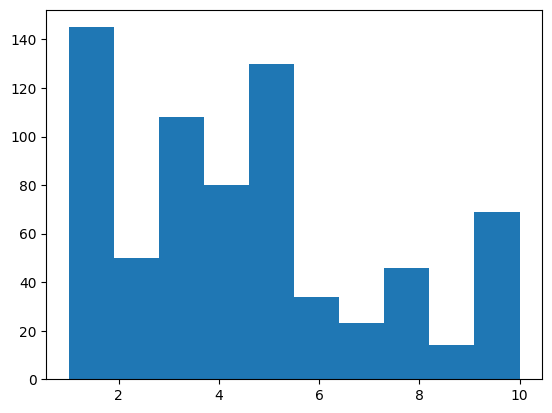

In [47]:
plt.hist(cancer.Clump_Thickness)

(d) Utiliser la fonction `scatter()` pour afficher la variable `Cell_Size_Uniformity` en fonction de la variable `Cell_Shape_Uniformity` et étudier la corrélation des 2 variables

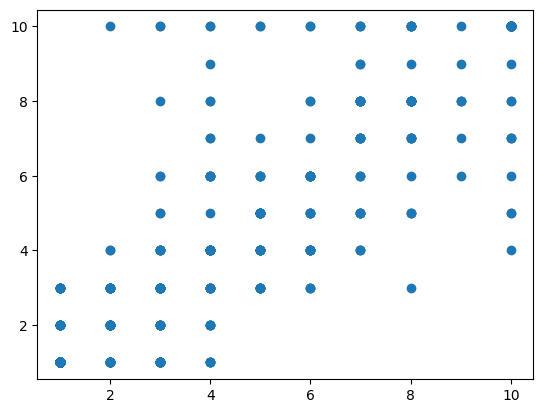

In [48]:
plt.scatter(cancer.Cell_Shape_Uniformity, cancer.Cell_Size_Uniformity)

In [49]:
np.corrcoef(cancer.Cell_Shape_Uniformity, cancer.Cell_Size_Uniformity)

array([[1.        , 0.90688191],
       [0.90688191, 1.        ]])

(e) A l’aide de la fonction `crosstab`, afficher la table de contingence des variables `Mitoses` et `class`

In [50]:
pd.crosstab(cancer.Mitoses, cancer.Class)

Class,benign,malignant
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14
